# 이상치 처리하기

In [1]:
import pandas as pd
import numpy as np

### # 사용할 데이터 불러오기

In [102]:
# 파일 경로 지정
file_path = "./data/bicycle_out.csv"

# 파일을 읽어 들여서 DataFrame 형태로 읽어드리기
df= pd.read_csv(file_path)

In [103]:
df

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN,32
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0,21
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
...,...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,NaN,5.0,NaN,22
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


### # 결측치 있는 행 삭제와 확인

In [104]:
df_drop_allrow = df.dropna(axis = 0)

print(df_drop_allrow)

df_drop_allrow.isnull().sum(0)

         자전거번호              대여일시  대여소번호               대여소명  대여거치대  \
0    SPB-23220   2019-11-01 8:48    646  장한평역 1번출구 (국민은행앞)    3.0   
1    SPB-16216   2019-11-04 8:38    646  장한평역 1번출구 (국민은행앞)    2.0   
4    SPB-07935  2019-11-05 12:29    512        뚝섬역 1번 출구 옆   11.0   
5    SPB-18401   2019-11-06 8:52    646  장한평역 1번출구 (국민은행앞)    1.0   
6    SPB-18350   2019-11-06 8:35    646  장한평역 1번출구 (국민은행앞)    1.0   
..         ...               ...    ...                ...    ...   
414  SPB-24515   2019-11-15 3:58    112            극동방송국 앞    1.0   
415  SPB-12116   2019-11-15 4:22    112            극동방송국 앞    5.0   
417  SPB-18841  2019-11-15 20:40    113       홍대입구역 2번출구 앞   24.0   
418  SPB-24467  2019-11-15 21:55    152         마포구민체육센터 앞   18.0   
419  SPB-17570  2019-11-15 22:16    391              정동길입구    7.0   

                 반납일시  반납대여소번호       반납대여소명  반납거치대  이용시간    이용거리   나이  
0     2019-11-01 9:01        3         중랑센터    7.0  12.0  1100.0   50  
1     2019-11-04 8:56      

자전거번호      0
대여일시       0
대여소번호      0
대여소명       0
대여거치대      0
반납일시       0
반납대여소번호    0
반납대여소명     0
반납거치대      0
이용시간       0
이용거리       0
나이         0
dtype: int64

### # 인덱스 번호 재배열
  * 데이터 제거할 때 함께 사라진 인덱스 번호를 다시 부여하려고 할 때
  * drop = True
    - 기존 index 컬럼 삭제

In [123]:
df_drop_allrow = df_drop_allrow.reset_index(drop=True)

df_drop_allrow

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
3,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
4,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...
353,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
354,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
355,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
356,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


### # 이상치 그림으로 확인

In [106]:
import matplotlib as mpl
import matplotlib.pylab as plt

### # 박스플롯 그리기

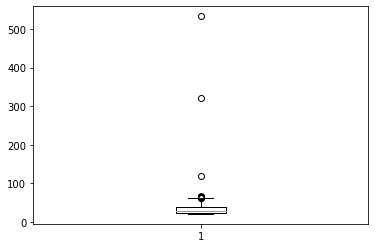

In [107]:
plt.boxplot(df_drop_allrow["나이"])
plt.show()

### # boxplot에서 max 값과 describe(기초통계 함수)에서 max 값의 차이점
  * boxplot()에서 max 값은 75%값에 중앙값의 1.5배를 더한 값
  * describe()에서 max 값은 값들 중에 실제 가장 높은 수

In [108]:
df_drop_allrow["나이"].describe()

count    358.000000
mean      35.159218
std       32.747653
min       21.000000
25%       24.000000
50%       29.000000
75%       39.000000
max      533.000000
Name: 나이, dtype: float64

### # 나이가 100살을 초과하는 데이터 조회

In [124]:
df_drop_allrow[df_drop_allrow["나이"] > 100 ]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320


### # 나이가 10살 이하의 데이터 조회

In [125]:
df_drop_allrow[df_drop_allrow["나이"] <= 10 ]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이


### # 나이가 100살을 초과하거나 10살 이하인 데이터 조회

In [126]:
df_drop_allrow[(df_drop_allrow["나이"] > 100) | (df_drop_allrow["나이"] <= 10)]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320


## [최대값/최소값 계산하여 이상치 제거]

### # q1(25%), q3(75%) 확인

In [112]:
np.percentile(df_drop_allrow["나이"], [25, 75])

array([24., 39.])

### # 여러 값을 return 받기

In [113]:
q1, q3 = np.percentile(df_drop_allrow["나이"], [25, 75])

In [114]:
q1

24.0

In [115]:
q3

39.0

###  # iqr(interquartile, 중간값) 구하기

In [116]:
iqr = q3 - q1

iqr

15.0

### # 최대값 = q3 + (iqr * 1.5)

In [117]:
upper_bound = q3 + (iqr * 1.5)

upper_bound

61.5

### # 최소값 = q1 - (iqr * 1.5)

In [118]:
lower_bound = q1 - (iqr * 1.5)

lower_bound

1.5

### # 이상치 데이터 찾아보기

In [119]:
df_drop_allrow[(df_drop_allrow["나이"] > upper_bound) | (df_drop_allrow["나이"] < lower_bound)]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
30,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
47,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
148,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.0,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.0,1130.0,65
221,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.0,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.0,12610.0,66
263,SPB-15960,2019-11-08 9:10,103,망원역 2번출구 앞,1.0,2019-11-08 9:18,101,(구)합정동 주민센터,4.0,8.0,1060.0,63
294,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.0,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.0,1360.0,65
361,SPB-24781,2019-11-12 9:47,104,합정역 1번출구 앞,10.0,2019-11-12 9:53,101,(구)합정동 주민센터,3.0,6.0,1070.0,63
362,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.0,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.0,5600.0,65
363,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.0,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.0,2060.0,67


### # 이상치를 찾는 함수로 만들기('나이'컬럼 기준만)
  * 매개변수가 없이

In [64]:
def outliers_iqr() : 
    q1, q3 = np.percentile(df_drop_allrow["나이"], [25, 75])    
    print(q1)
    print(q3)
    
    iqr = q3 - q1    
    print(iqr)
    
    upper_bound = q3 + (iqr * 1.5)
    print(upper_bound)
    
    lower_bound = q1 - (iqr * 1.5)
    print(lower_bound)
    
    df_temp = df_drop_allrow[(df_drop_allrow["나이"] > upper_bound) | (df_drop_allrow["나이"] < lower_bound)]
    print(len(df_temp))
    print(df_temp)

outliers_iqr()

24.0
39.0
15.0
61.5
1.5
10
         자전거번호              대여일시  대여소번호          대여소명  대여거치대  \
4    SPB-07935  2019-11-05 12:29    512   뚝섬역 1번 출구 옆   11.0   
30   SPB-20840   2019-11-28 8:32    419        홈플러스 앞    1.0   
47   SPB-11637  2019-11-01 15:35    103    망원역 2번출구 앞    4.0   
148  SPB-24758  2019-11-04 17:59    106    합정역 7번출구 앞    7.0   
221  SPB-06127  2019-11-06 16:06   1925  동양미래대학교 정문 옆    6.0   
263  SPB-15960   2019-11-08 9:10    103    망원역 2번출구 앞    1.0   
294  SPB-08818  2019-11-08 23:13    108       서교동 사거리    2.0   
361  SPB-24781   2019-11-12 9:47    104    합정역 1번출구 앞   10.0   
362  SPB-24781  2019-11-12 10:45    101   (구)합정동 주민센터    3.0   
363  SPB-24858  2019-11-12 11:41    113  홍대입구역 2번출구 앞   21.0   

                 반납일시  반납대여소번호       반납대여소명  반납거치대  이용시간     이용거리   나이  
4    2019-11-05 12:39        3         중랑센터    7.0  10.0   1650.0  120  
30    2019-11-28 8:35        5     상암센터 정비실    5.0   3.0    280.0  533  
47   2019-11-01 15:41      101  (구)합정동 주민센터    2.

### # 매개변수가 있는 함수 만들기
  * 데이터를 넘겨주는 대로 이상치 값을 출력

In [71]:
def outliers_iqr2(data) : 
    q1, q3 = np.percentile(data, [25, 75])    
    print(q1)
    print(q3)
    
    iqr = q3 - q1    
    print(iqr)
    
    upper_bound = q3 + (iqr * 1.5)
    print(upper_bound)
    
    lower_bound = q1 - (iqr * 1.5)
    print(lower_bound)
    
    df_temp = df_drop_allrow[(data > upper_bound) | (data < lower_bound)]
    print(len(df_temp))
    print(df_temp)

outliers_iqr2(df_drop_allrow["나이"])

24.0
39.0
15.0
61.5
1.5
10
         자전거번호              대여일시  대여소번호          대여소명  대여거치대  \
4    SPB-07935  2019-11-05 12:29    512   뚝섬역 1번 출구 옆   11.0   
30   SPB-20840   2019-11-28 8:32    419        홈플러스 앞    1.0   
47   SPB-11637  2019-11-01 15:35    103    망원역 2번출구 앞    4.0   
148  SPB-24758  2019-11-04 17:59    106    합정역 7번출구 앞    7.0   
221  SPB-06127  2019-11-06 16:06   1925  동양미래대학교 정문 옆    6.0   
263  SPB-15960   2019-11-08 9:10    103    망원역 2번출구 앞    1.0   
294  SPB-08818  2019-11-08 23:13    108       서교동 사거리    2.0   
361  SPB-24781   2019-11-12 9:47    104    합정역 1번출구 앞   10.0   
362  SPB-24781  2019-11-12 10:45    101   (구)합정동 주민센터    3.0   
363  SPB-24858  2019-11-12 11:41    113  홍대입구역 2번출구 앞   21.0   

                 반납일시  반납대여소번호       반납대여소명  반납거치대  이용시간     이용거리   나이  
4    2019-11-05 12:39        3         중랑센터    7.0  10.0   1650.0  120  
30    2019-11-28 8:35        5     상암센터 정비실    5.0   3.0    280.0  533  
47   2019-11-01 15:41      101  (구)합정동 주민센터    2.

### # 매개변수가 두 개인 함수

In [100]:
def outliers_iqr3(dframe, data) : 
    q1, q3 = np.percentile(data, [25, 75])    
    print(q1)
    print(q3)
    
    iqr = q3 - q1    
    print(iqr)
    
    upper_bound = q3 + (iqr * 1.5)
    print(upper_bound)
    
    lower_bound = q1 - (iqr * 1.5)
    print(lower_bound)
    
    df_temp = dframe[(data > upper_bound) | (data < lower_bound)]
    print(len(df_temp))
    print(df_temp)

outliers_iqr3(df_drop_allrow, df_drop_allrow["나이"])

24.0
39.0
15.0
61.5
1.5
10
         자전거번호              대여일시  대여소번호          대여소명  대여거치대  \
4    SPB-07935  2019-11-05 12:29    512   뚝섬역 1번 출구 옆   11.0   
30   SPB-20840   2019-11-28 8:32    419        홈플러스 앞    1.0   
47   SPB-11637  2019-11-01 15:35    103    망원역 2번출구 앞    4.0   
148  SPB-24758  2019-11-04 17:59    106    합정역 7번출구 앞    7.0   
221  SPB-06127  2019-11-06 16:06   1925  동양미래대학교 정문 옆    6.0   
263  SPB-15960   2019-11-08 9:10    103    망원역 2번출구 앞    1.0   
294  SPB-08818  2019-11-08 23:13    108       서교동 사거리    2.0   
361  SPB-24781   2019-11-12 9:47    104    합정역 1번출구 앞   10.0   
362  SPB-24781  2019-11-12 10:45    101   (구)합정동 주민센터    3.0   
363  SPB-24858  2019-11-12 11:41    113  홍대입구역 2번출구 앞   21.0   

                 반납일시  반납대여소번호       반납대여소명  반납거치대  이용시간     이용거리   나이  
4    2019-11-05 12:39        3         중랑센터    7.0  10.0   1650.0  120  
30    2019-11-28 8:35        5     상암센터 정비실    5.0   3.0    280.0  533  
47   2019-11-01 15:41      101  (구)합정동 주민센터    2.

### # 만든 함수 모듈로 만들기
  * 정의된 함수 문장만 따로 .py 파이썬 확장자로 만들기
  * 작업하고 있는 문서가 있는 폴더로 이동

In [92]:
outliers.outliers_iqr3(df_drop_allrow, df_drop_allrow["나이"])

NameError: name 'np' is not defined

In [128]:
((df_drop_allrow["나이"] > 61.5) | (df_drop_allrow["나이"] < 1.5))

0      False
1      False
2       True
3      False
4      False
       ...  
353    False
354    False
355    False
356    False
357    False
Name: 나이, Length: 358, dtype: bool

### # 행 번호만 조회

In [129]:
np.where((df_drop_allrow["나이"] > 61.5) | (df_drop_allrow["나이"] < 1.5))

(array([  2,  19,  33, 117, 180, 218, 246, 304, 305, 306], dtype=int64),)

### # 이상치가 있는 데이터 index 번호만 조회

In [132]:
def get_outliers_data(data) : 
    q1, q3 = np.percentile(data, [25, 75])    
    print(q1)
    print(q3)
    
    iqr = q3 - q1    
    print(iqr)
    
    upper_bound = q3 + (iqr * 1.5)
    print(upper_bound)
    
    lower_bound = q1 - (iqr * 1.5)
    print(lower_bound)
    
    '''
    df_temp = dframe[(data > upper_bound) | (data < lower_bound)]
    print(len(df_temp))
    print(df_temp)
    '''
    
    return np.where((data > 61.5) | (data < 1.5))

In [133]:
get_outliers_data(df_drop_allrow["나이"])

24.0
39.0
15.0
61.5
1.5


(array([  2,  19,  33, 117, 180, 218, 246, 304, 305, 306], dtype=int64),)

### # 이상치가 있는 데이터를 행번호로 찾아서 전체 데이터프레임 출력

In [134]:
df_drop_allrow.loc[get_outliers_data(df_drop_allrow["나이"])]

24.0
39.0
15.0
61.5
1.5


,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
117,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.0,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.0,1130.0,65
180,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.0,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.0,12610.0,66
218,SPB-15960,2019-11-08 9:10,103,망원역 2번출구 앞,1.0,2019-11-08 9:18,101,(구)합정동 주민센터,4.0,8.0,1060.0,63
246,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.0,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.0,1360.0,65
304,SPB-24781,2019-11-12 9:47,104,합정역 1번출구 앞,10.0,2019-11-12 9:53,101,(구)합정동 주민센터,3.0,6.0,1070.0,63
305,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.0,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.0,5600.0,65
306,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.0,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.0,2060.0,67


In [135]:
age_oulier_index = get_outliers_data(df_drop_allrow["나이"])

24.0
39.0
15.0
61.5
1.5


In [138]:
df_drop_allrow.loc[age_oulier_index]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
117,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.0,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.0,1130.0,65
180,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.0,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.0,12610.0,66
218,SPB-15960,2019-11-08 9:10,103,망원역 2번출구 앞,1.0,2019-11-08 9:18,101,(구)합정동 주민센터,4.0,8.0,1060.0,63
246,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.0,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.0,1360.0,65
304,SPB-24781,2019-11-12 9:47,104,합정역 1번출구 앞,10.0,2019-11-12 9:53,101,(구)합정동 주민센터,3.0,6.0,1070.0,63
305,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.0,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.0,5600.0,65
306,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.0,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.0,2060.0,67


### # 이상치 제거하기
  * 이상치 아닌 값만 추출해서 따로 저장

#### * for 문 돌리기 전 작업

In [145]:
age_oulier_index.index

<function tuple.index(value, start=0, stop=9223372036854775807, /)>

In [146]:
age_oulier_index

(array([  2,  19,  33, 117, 180, 218, 246, 304, 305, 306], dtype=int64),)

In [140]:
df_drop_allrow.index

RangeIndex(start=0, stop=358, step=1)

#### * for 문 돌리기

In [147]:
age_non_outlier_index = []

for idx in df_drop_allrow.index : 
    
    if idx not in age_oulier_index[0] : # age_oulier_index를 출력해보면 0번째 인덱스에 값들이 모여 있다. 1번째 인덱스에는 dtype=int64 이 있다.
        age_non_outlier_index.append(idx)
        
age_non_outlier_index

[0,
 1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 1

In [148]:
len(age_non_outlier_index)

348

### # 정상 데이터만 행번호로 조회

In [150]:
df_new = df_drop_allrow.loc[age_non_outlier_index]

In [151]:
df_new

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
3,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
4,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
5,SPB-11557,2019-11-08 14:52,3,중랑센터,7.0,2019-11-08 15:40,3,중랑센터,7.0,47.0,0.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...
353,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
354,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
355,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
356,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


### # 인덱스 번호 재배열하고 변수에 저장하고 조회

In [154]:
df_new = df_new.reset_index(drop=True)

df_new

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
3,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
4,SPB-11557,2019-11-08 14:52,3,중랑센터,7.0,2019-11-08 15:40,3,중랑센터,7.0,47.0,0.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...
343,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
344,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
345,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
346,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27
